## Check out this [network](https://github.com/kentaroy47/vision-transformers-cifar10/blob/main/models/vit.py)

* Re-write this network such that it is similar to the network we wrote in the class

* All parameters are the same as the network we wrote

* Proceed to submit the assignment:

    > Share the model code and link to the model cost

    > Share the training logs

    > Share the gradcam images for 10 misclassified images


1.   [EVA8_API](https://github.com/ojhajayant/EVA8_API) is the main repo which is being cloned here to be able to run the main.py script with various user provided (or default) arg options.







In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Mar  2 17:38:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    51W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##  Install the EVA8 packages, hosted @ github

In [2]:

!pip install git+https://git@github.com/ojhajayant//EVA8_API.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://****@github.com/ojhajayant//EVA8_API.git to /tmp/pip-req-build-pjp4di5j
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/ojhajayant//EVA8_API.git' /tmp/pip-req-build-pjp4di5j
  Resolved https://****@github.com/ojhajayant//EVA8_API.git to commit 85a430d95c0df0eca3c8b329ea1f64d25b4177c8
  Preparing metadata (setup.py) ... done
  Created wheel for EVA8-API: filename=EVA8_API-0.0.0-py3-none-any.whl size=30379 sha256=46fadacf6e2bda30869f9a116522cd366383f8242eea87c1546a7ef1eb96ea76
  Stored in directory: /tmp/pip-ephem-wheel-cache-4ws2fis6/wheels/5a/75/07/3896c73523adfee1c7bbad204b8ebeba4397d8209609d9a168
Successfully built EVA8-API


In [3]:

!pip install opencv-python-headless==4.1.2.30

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 72.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


In [4]:
!pip install albumentations --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 KB 12.4 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1


In [5]:


!pip install grad-cam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 90.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.6-py3-none-any.whl size=38261 sha256=b0d51bc703f09cf756837b72b2909b39cda75864e78cd17351085dea98ad6cd4
  Stored in directory: /root/.cache/pip/wheels/53/02/43/1f75726b5c28459596067ad91e36951463c01273eef661f09f
Successfully built grad-cam


In [6]:
!pip install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 4.6 MB/s eta 0:00:00


In [7]:
!git clone https://git@github.com/ojhajayant//EVA8_API.git

Cloning into 'EVA8_API'...
remote: Enumerating objects: 472, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 472 (delta 56), reused 11 (delta 11), pack-reused 388
Receiving objects: 100% (472/472), 208.25 KiB | 17.35 MiB/s, done.
Resolving deltas: 100% (303/303), done.


In [8]:
%cd EVA8_API




/content/EVA8_API


In [9]:

%pwd

'/content/EVA8_API'

### Run the main.py script to enable the LR Range test







CUDA Available? True

	Here are the different args values for this run:
	cmd : lr_find
	IPYNB_ENV : True
	use_albumentations : True
	SEED : 1
	dataset : CIFAR10
	img_size : (32, 32)
	batch_size : 512
	epochs : 24
	criterion : CrossEntropyLoss()
	init_lr : 1e-05
	end_lr : 1.0
	max_lr_epochs : 5
	lr_range_test_epochs : 10
	best_lr : 0.03
	cycle_momentum : True
	div_factor : 10
	optimizer : <class 'torch.optim.adam.Adam'>
	cuda : True
	dropout : 0.08
	l1_weight : 2.5e-05
	l2_weight_decay : 0.0002125
	L1 : True
	L2 : False
	data : ./data/
	best_model_path : ./saved_models/
	prefix : data
	best_model :  


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data

The mean & std-dev tuples for the CIFAR10 dataset:
[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]
Using albumentation lib for image-augmentation & other transforms
************
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True
[Stats from Train Data]
 - Numpy Shape: (50000, 32, 32, 3)
 - Tensor Shape: torch.Size([50000, 32, 32, 3])
 - min: tensor(0, dtype=torch.uint8)
 - max: tensor(255, dtype=torch.uint8)
[Stats from Test Data]
 - Numpy Shape: (10000, 32, 32, 3)
 - Tensor Shape: torch.Size([10000, 32, 32, 3])
 - min: tensor(0, dtype=torch.uint8)
 - max: tensor(255, dtype=torch.uint8)


torch.Size([512, 3, 32, 32])
torch.Size([512])
Saving plot for a sample to ascertain RF required for edges & gradient /content/EVA8_API/./data/data_stats.png


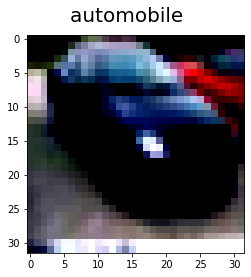

Here are a few samples BEFORE TRANSFORMS APPLIED:


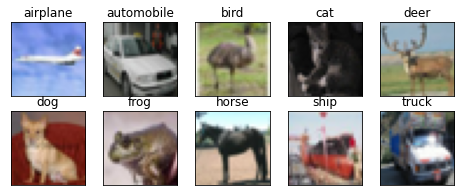

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              GELU-2           [-1, 32, 32, 32]               0
            Conv2d-3           [-1, 32, 16, 16]           4,128
              GELU-4           [-1, 32, 16, 16]               0
         Rearrange-5              [-1, 32, 256]               0
         Rearrange-6           [-1, 256, 32, 1]               0
            Conv2d-7            [-1, 64, 32, 1]          16,448
         Rearrange-8               [-1, 32, 64]               0
           Dropout-9               [-1, 33, 64]               0
        LayerNorm-10               [-1, 33, 64]             128
        Rearrange-11            [-1, 64, 33, 1]               0
           Conv2d-12           [-1, 192, 33, 1]          12,288
        Rearrange-13              [-1, 33, 192]               0
          Softmax-14            [-

  0%|          | 0/980 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR (for Least Loss value: 1.5154882916863581 to be used: 0.6704299726031109
LR suggestion: steepest gradient
Suggested LR: 2.07E-01


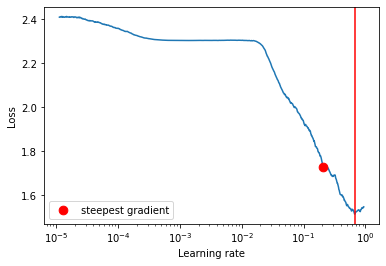

best_lr is 0.6704299726031109


<Figure size 432x288 with 0 Axes>

In [10]:
%matplotlib inline
%run /content/EVA8_API/main.py --cmd lr_find --init_lr 1e-5 --end_lr 1 --lr_range_test_epochs 10

### With the best_lr found from above "lr_find" run, model is trained by running the main.py script under "train" command



CUDA Available? True

	Here are the different args values for this run:
	cmd : train
	IPYNB_ENV : True
	use_albumentations : True
	SEED : 1
	dataset : CIFAR10
	img_size : (32, 32)
	batch_size : 512
	epochs : 24
	criterion : CrossEntropyLoss()
	init_lr : 0.0001
	end_lr : 1
	max_lr_epochs : 5
	lr_range_test_epochs : 10
	best_lr : 0.03
	cycle_momentum : True
	div_factor : 10
	optimizer : <class 'torch.optim.adam.Adam'>
	cuda : True
	dropout : 0.08
	l1_weight : 2.5e-05
	l2_weight_decay : 0.0002125
	L1 : True
	L2 : False
	data : ./data/
	best_model_path : ./saved_models/
	prefix : data
	best_model :  


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data

The mean & std-dev tuples for the CIFAR10 dataset:
[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]
Using albumentation lib for image-augmentation & other transforms
************
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True
[Stats from Train Data]
 - Numpy Shape: (50000, 32, 32, 3)
 - Tensor Shape: torch.Size([50000, 32, 32, 3])
 - min: tensor(0, dtype=torch.uint8)
 - max: tensor(255, dtype=torch.uint8)
[Stats from Test Data]
 - Numpy Shape: (10000, 32, 32, 3)
 - Tensor Shape: torch.Size([10000, 32, 32, 3])
 - min: tensor(0, dtype=torch.uint8)
 - max: tensor(255, dtype=torch.uint8)


torch.Size([512, 3, 32, 32])
torch.Size([512])
Saving plot for a sample to ascertain RF required for edges & gradient /content/EVA8_API/./data/data_stats.png


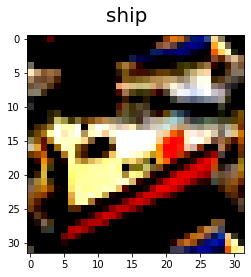

Here are a few samples BEFORE TRANSFORMS APPLIED:


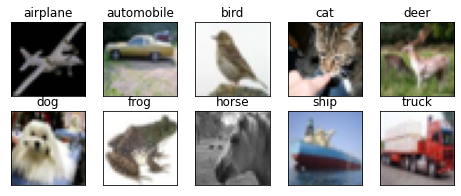

Here are a few samples AFTER TRANSFORMS APPLIED:


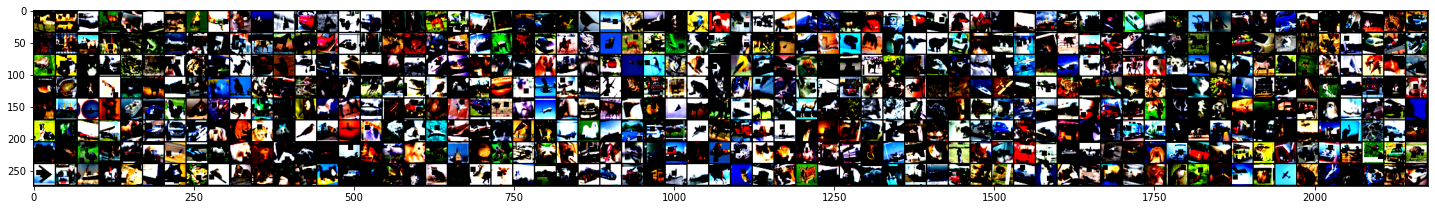

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              GELU-2           [-1, 32, 32, 32]               0
            Conv2d-3           [-1, 32, 16, 16]           4,128
              GELU-4           [-1, 32, 16, 16]               0
         Rearrange-5              [-1, 32, 256]               0
         Rearrange-6           [-1, 256, 32, 1]               0
            Conv2d-7            [-1, 64, 32, 1]          16,448
         Rearrange-8               [-1, 32, 64]               0
           Dropout-9               [-1, 33, 64]               0
        LayerNorm-10               [-1, 33, 64]             128
        Rearrange-11            [-1, 64, 33, 1]               0
           Conv2d-12           [-1, 192, 33, 1]          12,288
        Rearrange-13              [-1, 33, 192]               0
          Softmax-14            [-

Loss=1.9587918519973755 Batch_id=97 Accuracy=27.70: 100%|██████████| 98/98 [00:06<00:00, 16.25it/s]



Test set: Average loss: 0.0033, Accuracy: 4084/10000 (40.84%)

validation-accuracy improved from 0 to 40.84, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-1_L1-1_L2-0_val_acc-40.84.h5
EPOCH: 2
LR: 0.008411042944785275


Loss=1.7193536758422852 Batch_id=97 Accuracy=40.73: 100%|██████████| 98/98 [00:05<00:00, 17.79it/s]



Test set: Average loss: 0.0031, Accuracy: 4515/10000 (45.15%)

validation-accuracy improved from 40.84 to 45.15, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-2_L1-1_L2-0_val_acc-45.15.h5
EPOCH: 3
LR: 0.01382208588957055


Loss=1.7354938983917236 Batch_id=97 Accuracy=43.16: 100%|██████████| 98/98 [00:05<00:00, 17.81it/s]



Test set: Average loss: 0.0027, Accuracy: 5099/10000 (50.99%)

validation-accuracy improved from 45.15 to 50.99, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-3_L1-1_L2-0_val_acc-50.99.h5
EPOCH: 4
LR: 0.019233128834355826


Loss=1.6892670392990112 Batch_id=97 Accuracy=43.82: 100%|██████████| 98/98 [00:05<00:00, 17.98it/s]



Test set: Average loss: 0.0028, Accuracy: 4970/10000 (49.70%)

EPOCH: 5
LR: 0.024644171779141102


Loss=1.6961021423339844 Batch_id=97 Accuracy=43.93: 100%|██████████| 98/98 [00:05<00:00, 17.49it/s]



Test set: Average loss: 0.0028, Accuracy: 5030/10000 (50.30%)

EPOCH: 6
LR: 0.02998404940923738


Loss=1.640432357788086 Batch_id=97 Accuracy=45.96: 100%|██████████| 98/98 [00:05<00:00, 18.13it/s]



Test set: Average loss: 0.0027, Accuracy: 5102/10000 (51.02%)

validation-accuracy improved from 50.99 to 51.02, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-6_L1-1_L2-0_val_acc-51.02.h5
EPOCH: 7
LR: 0.028420891514500536


Loss=1.4598321914672852 Batch_id=97 Accuracy=47.30: 100%|██████████| 98/98 [00:05<00:00, 17.85it/s]



Test set: Average loss: 0.0025, Accuracy: 5440/10000 (54.40%)

validation-accuracy improved from 51.02 to 54.4, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-7_L1-1_L2-0_val_acc-54.4.h5
EPOCH: 8
LR: 0.026857733619763693


Loss=1.532556176185608 Batch_id=97 Accuracy=48.91: 100%|██████████| 98/98 [00:05<00:00, 17.94it/s]



Test set: Average loss: 0.0027, Accuracy: 5182/10000 (51.82%)

EPOCH: 9
LR: 0.02529457572502685


Loss=1.468367576599121 Batch_id=97 Accuracy=49.88: 100%|██████████| 98/98 [00:05<00:00, 17.86it/s]



Test set: Average loss: 0.0024, Accuracy: 5678/10000 (56.78%)

validation-accuracy improved from 54.4 to 56.78, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-9_L1-1_L2-0_val_acc-56.78.h5
EPOCH: 10
LR: 0.02373141783029001


Loss=1.5203700065612793 Batch_id=97 Accuracy=51.97: 100%|██████████| 98/98 [00:05<00:00, 17.43it/s]



Test set: Average loss: 0.0024, Accuracy: 5670/10000 (56.70%)

EPOCH: 11
LR: 0.022168259935553165


Loss=1.4884910583496094 Batch_id=97 Accuracy=52.31: 100%|██████████| 98/98 [00:05<00:00, 17.18it/s]



Test set: Average loss: 0.0023, Accuracy: 5754/10000 (57.54%)

validation-accuracy improved from 56.78 to 57.54, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-11_L1-1_L2-0_val_acc-57.54.h5
EPOCH: 12
LR: 0.020605102040816326


Loss=1.3453963994979858 Batch_id=97 Accuracy=53.84: 100%|██████████| 98/98 [00:05<00:00, 17.84it/s]



Test set: Average loss: 0.0022, Accuracy: 6016/10000 (60.16%)

validation-accuracy improved from 57.54 to 60.16, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-12_L1-1_L2-0_val_acc-60.16.h5
EPOCH: 13
LR: 0.019041944146079483


Loss=1.3861701488494873 Batch_id=97 Accuracy=54.67: 100%|██████████| 98/98 [00:05<00:00, 17.86it/s]



Test set: Average loss: 0.0022, Accuracy: 6008/10000 (60.08%)

EPOCH: 14
LR: 0.017478786251342644


Loss=1.2919758558273315 Batch_id=97 Accuracy=55.54: 100%|██████████| 98/98 [00:05<00:00, 17.52it/s]



Test set: Average loss: 0.0021, Accuracy: 6166/10000 (61.66%)

validation-accuracy improved from 60.16 to 61.66, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-14_L1-1_L2-0_val_acc-61.66.h5
EPOCH: 15
LR: 0.0159156283566058


Loss=1.4092254638671875 Batch_id=97 Accuracy=56.29: 100%|██████████| 98/98 [00:05<00:00, 17.80it/s]



Test set: Average loss: 0.0022, Accuracy: 6089/10000 (60.89%)

EPOCH: 16
LR: 0.014352470461868959


Loss=1.3275909423828125 Batch_id=97 Accuracy=57.03: 100%|██████████| 98/98 [00:05<00:00, 17.83it/s]



Test set: Average loss: 0.0021, Accuracy: 6116/10000 (61.16%)

EPOCH: 17
LR: 0.01278931256713212


Loss=1.290686845779419 Batch_id=97 Accuracy=58.01: 100%|██████████| 98/98 [00:05<00:00, 18.14it/s]



Test set: Average loss: 0.0021, Accuracy: 6154/10000 (61.54%)

EPOCH: 18
LR: 0.011226154672395273


Loss=1.1936556100845337 Batch_id=97 Accuracy=58.97: 100%|██████████| 98/98 [00:05<00:00, 17.61it/s]



Test set: Average loss: 0.0021, Accuracy: 6270/10000 (62.70%)

validation-accuracy improved from 61.66 to 62.7, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-18_L1-1_L2-0_val_acc-62.7.h5
EPOCH: 19
LR: 0.00966299677765843


Loss=1.2783204317092896 Batch_id=97 Accuracy=58.96: 100%|██████████| 98/98 [00:05<00:00, 18.18it/s]



Test set: Average loss: 0.0020, Accuracy: 6441/10000 (64.41%)

validation-accuracy improved from 62.7 to 64.41, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-19_L1-1_L2-0_val_acc-64.41.h5
EPOCH: 20
LR: 0.008099838882921592


Loss=1.2840720415115356 Batch_id=97 Accuracy=60.16: 100%|██████████| 98/98 [00:05<00:00, 17.62it/s]



Test set: Average loss: 0.0019, Accuracy: 6494/10000 (64.94%)

validation-accuracy improved from 64.41 to 64.94, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-20_L1-1_L2-0_val_acc-64.94.h5
EPOCH: 21
LR: 0.006536680988184749


Loss=1.2337315082550049 Batch_id=97 Accuracy=61.09: 100%|██████████| 98/98 [00:05<00:00, 17.64it/s]



Test set: Average loss: 0.0019, Accuracy: 6586/10000 (65.86%)

validation-accuracy improved from 64.94 to 65.86, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-21_L1-1_L2-0_val_acc-65.86.h5
EPOCH: 22
LR: 0.004973523093447906


Loss=1.2584549188613892 Batch_id=97 Accuracy=62.10: 100%|██████████| 98/98 [00:05<00:00, 17.30it/s]



Test set: Average loss: 0.0019, Accuracy: 6620/10000 (66.20%)

validation-accuracy improved from 65.86 to 66.2, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-22_L1-1_L2-0_val_acc-66.2.h5
EPOCH: 23
LR: 0.0034103651987110635


Loss=1.130612850189209 Batch_id=97 Accuracy=62.76: 100%|██████████| 98/98 [00:05<00:00, 17.90it/s]



Test set: Average loss: 0.0018, Accuracy: 6653/10000 (66.53%)

validation-accuracy improved from 66.2 to 66.53, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-23_L1-1_L2-0_val_acc-66.53.h5
EPOCH: 24
LR: 0.0018472073039742243


Loss=1.144034504890442 Batch_id=97 Accuracy=63.49: 100%|██████████| 98/98 [00:05<00:00, 17.61it/s]



Test set: Average loss: 0.0018, Accuracy: 6758/10000 (67.58%)

validation-accuracy improved from 66.53 to 67.58, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-24_L1-1_L2-0_val_acc-67.58.h5


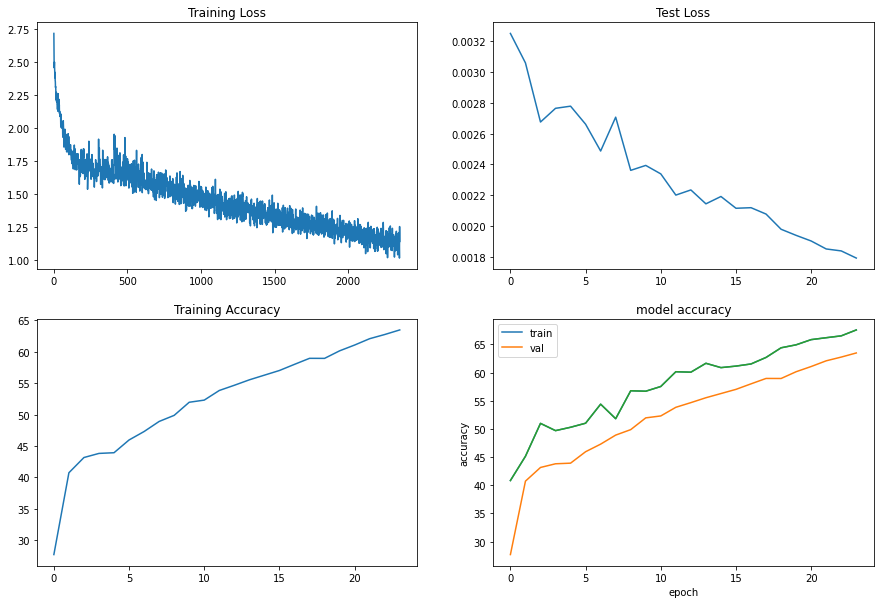

<Figure size 432x288 with 0 Axes>

In [10]:
%matplotlib inline
%run  /content/EVA8_API/main.py --cmd train 

### With the best_model found from above "train" run, saved best model above: CIFAR10_model_epoch-24_L1-1_L2-0_val_acc-67.58.h5 is loaded to get confusion matrix etc.



CUDA Available? True

	Here are the different args values for this run:
	cmd : test
	IPYNB_ENV : True
	use_albumentations : True
	SEED : 1
	dataset : CIFAR10
	img_size : (32, 32)
	batch_size : 512
	epochs : 24
	criterion : CrossEntropyLoss()
	init_lr : 0.0001
	end_lr : 1
	max_lr_epochs : 5
	lr_range_test_epochs : 10
	best_lr : 0.03
	cycle_momentum : True
	div_factor : 10
	optimizer : <class 'torch.optim.adam.Adam'>
	cuda : True
	dropout : 0.08
	l1_weight : 2.5e-05
	l2_weight_decay : 0.0002125
	L1 : True
	L2 : False
	data : ./data/
	best_model_path : ./saved_models/
	prefix : data
	best_model : CIFAR10_model_epoch-24_L1-1_L2-0_val_acc-67.58.h5
Files already downloaded and verified

The mean & std-dev tuples for the CIFAR10 dataset:
[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]
Using albumentation lib for image-augmentation & other transforms
************
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verif

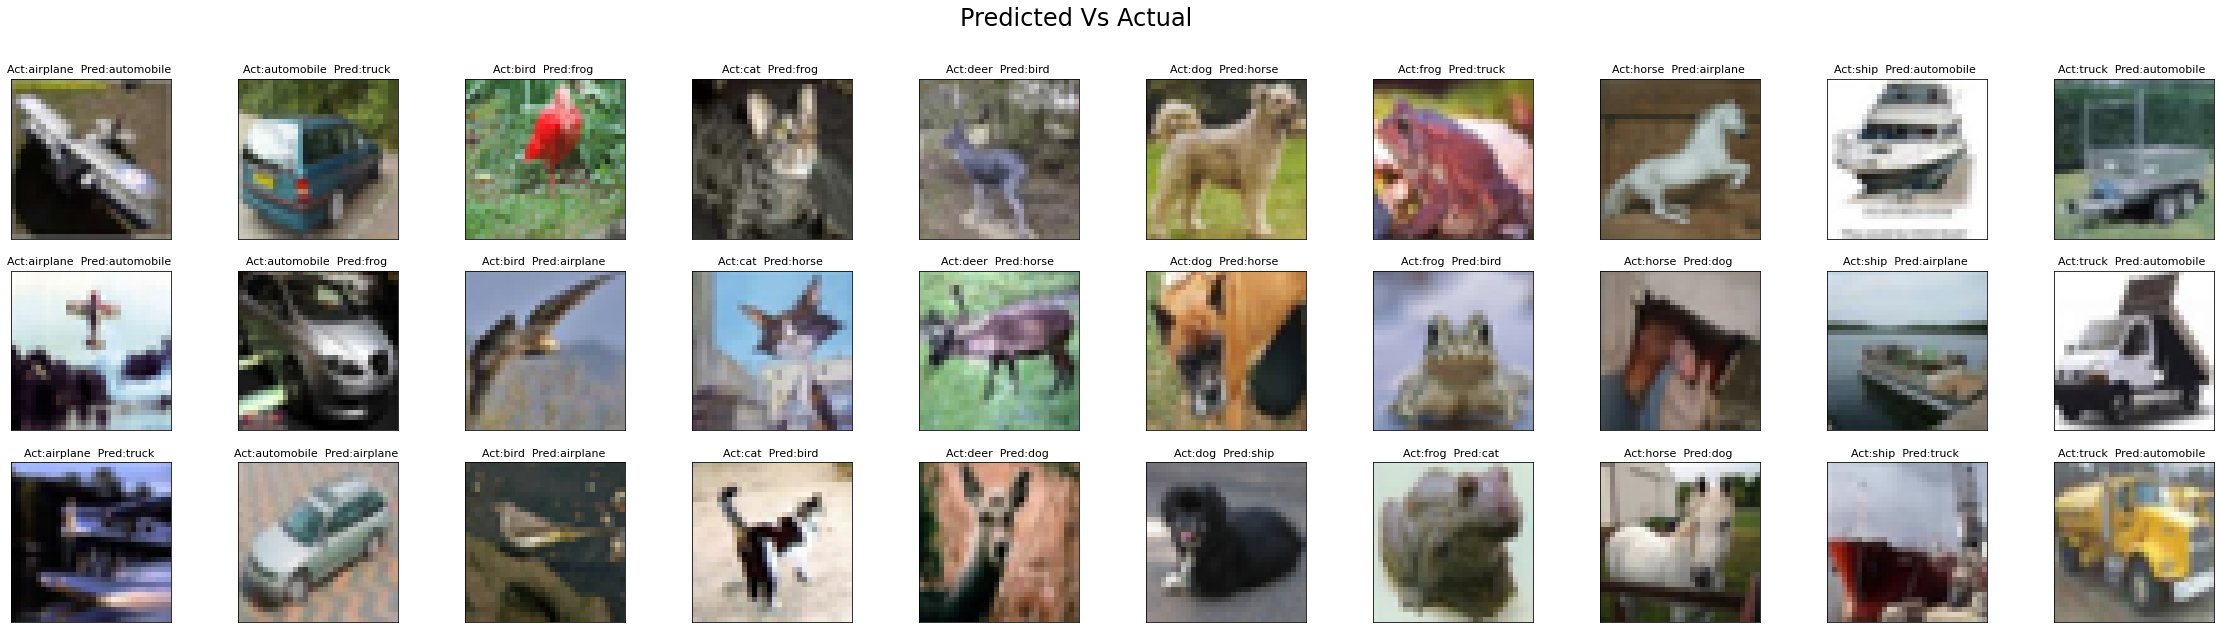

<Figure size 432x288 with 0 Axes>

In [11]:
%matplotlib inline
%run  /content/EVA8_API/main.py --cmd test --best_model CIFAR10_model_epoch-24_L1-1_L2-0_val_acc-67.58.h5